<a href="https://colab.research.google.com/github/AmanThakre/Machine-Learning/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 class MyLinearRegression:
    def __init__(self, weight=50 , bias=20, learning_rate=.01,
                 iterations=500):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0
        self.it=[]

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
            self.it.append(i)

           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


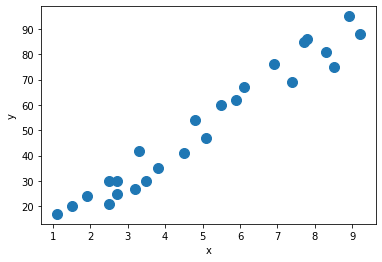

In [0]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split



X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Iteration: 0	 Weight: [21.1466]	 Bias: [15.439]	 Cost: 3018.890959932081
Iteration: 1	 Weight: [12.18145205]	 Bias: [13.99305632]	 Cost: 316.35930587972547
Iteration: 2	 Weight: [9.39887332]	 Bias: [13.51557902]	 Cost: 55.11628556615337
Iteration: 3	 Weight: [8.53823058]	 Bias: [13.33926551]	 Cost: 29.794534949156297
Iteration: 4	 Weight: [8.27503708]	 Bias: [13.25667364]	 Cost: 27.27223569550329
Iteration: 5	 Weight: [8.19755474]	 Bias: [13.20331628]	 Cost: 26.953763726709166
Iteration: 6	 Weight: [8.17778817]	 Bias: [13.15914622]	 Cost: 26.84879971905636
Iteration: 7	 Weight: [8.17594799]	 Bias: [13.11793109]	 Cost: 26.764999793974845
Iteration: 8	 Weight: [8.17966508]	 Bias: [13.07773312]	 Cost: 26.683772462575984
Iteration: 9	 Weight: [8.18509436]	 Bias: [13.03794956]	 Cost: 26.603317309057218
Iteration: 10	 Weight: [8.19104057]	 Bias: [12.99839268]	 Cost: 26.523456596736754
Iteration: 11	 Weight: [8.1971322]	 Bias: [12.95900378]	 Cost: 26.4441694278841
Iteration: 12	 Weight: [8.20

In [0]:
regressor.cost_trend


[3018.890959932081,
 316.35930587972547,
 55.11628556615337,
 29.794534949156297,
 27.27223569550329,
 26.953763726709166,
 26.84879971905636,
 26.764999793974845,
 26.683772462575984,
 26.603317309057218,
 26.523456596736754,
 26.4441694278841,
 26.365450087982566,
 26.287294356242036,
 26.20969818248786,
 26.132657559110225,
 26.056168508502985,
 25.980227081664356,
 25.90482935787774,
 25.829971444498103,
 25.75564947674993,
 25.681859617527625,
 25.608598057197334,
 25.535861013400286,
 25.463644730857595,
 25.391945481176244,
 25.3207595626567,
 25.250083300101785,
 25.17991304462689,
 25.110245173471576,
 25.04107608981266,
 24.972402222578403,
 24.904220026264106,
 24.836525980749226,
 24.76931659111549,
 24.70258838746654,
 24.636337924748744,
 24.570561782573332,
 24.505256565039808,
 24.440418900560765,
 24.376045441687538,
 24.312132864937617,
 24.24867787062299,
 24.185677182679765,
 24.123127548499042,
 24.06102573875898,
 23.999368547258115,
 23.938152790749776,
 23.87737

In [0]:
regressor.it

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


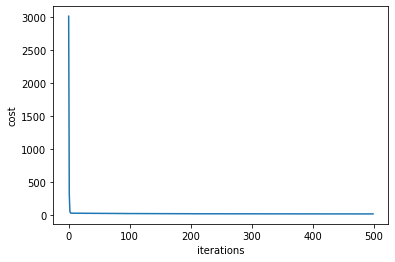

In [0]:
iterations=[1,2,3,4,5,6,7,8,9,10]
cost =[102.91008189424169,91.13317278598234,80.94548387910852,72.13255889976814,64.50888123548864,57.91396869153091,52.2089952377883,47.27386863183723,43.00470240023128,39.31162896162283]
plt.plot(regressor.it,regressor.cost_trend)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()